<a href="https://colab.research.google.com/github/JackBenadon/DS340W_Group22/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [6]:
df = pd.read_csv('CardiacPrediction.csv')
df

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,93691,1,25,10,1.59,92,112,76,39.2,136.5,...,4.14,1.27,5.8,2,2,1,2,1,2,0
37075,93695,2,76,4,1.43,78,112,46,59.1,165.8,...,3.62,1.76,5.6,2,2,1,2,2,2,0
37076,93697,2,80,7,2.97,74,146,58,71.7,152.2,...,6.62,2.90,5.7,2,2,1,2,2,2,0
37077,93700,1,35,1,0.00,76,106,66,78.2,173.3,...,3.72,1.09,5.2,2,2,1,2,2,1,0


## Exploratory Data Analysis

In [7]:
#Removes unimportant variables as shown in Research Paper 2
df.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)

In [8]:
#All Columns in the dataset
df.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'HDL', 'Glycohemoglobin', 'Vigorous-work', 'Moderate-work', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [9]:
heartDiseaseCount = (df['CoronaryHeartDisease'] == 1).sum()
noHeartDiseaseCount = (df['CoronaryHeartDisease'] == 0).sum()
print(f'People with heart disease: {heartDiseaseCount} \nPeople without heart disease: {noHeartDiseaseCount}')

People with heart disease: 1508 
People without heart disease: 35571


In [10]:
#importing packages for vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'CardiacPrediction.csv', 'drive', 'sample_data']


In [11]:
print(df.corr()["CoronaryHeartDisease"].sort_values(ascending=False))

CoronaryHeartDisease           1.000000
Age                            0.222649
Creatinine                     0.114318
Glycohemoglobin                0.101517
Uric.Acid                      0.098907
Glucose                        0.086754
Systolic                       0.080224
Red-Cell-Distribution-Width    0.074316
LDH                            0.072073
Vigorous-work                  0.054506
Triglycerides                  0.034160
Bilirubin                      0.030407
Weight                         0.029003
ALP                            0.028672
Moderate-work                  0.022683
Body-Mass-Index                0.022211
GGT                            0.014732
White-Blood-Cells              0.011565
Mean-Platelet-Vol              0.008768
AST                            0.008149
Basophils                     -0.000105
ALT                           -0.004512
Mean-cell-Hemoglobin          -0.014665
Hemoglobin                    -0.015201
Iron                          -0.018252


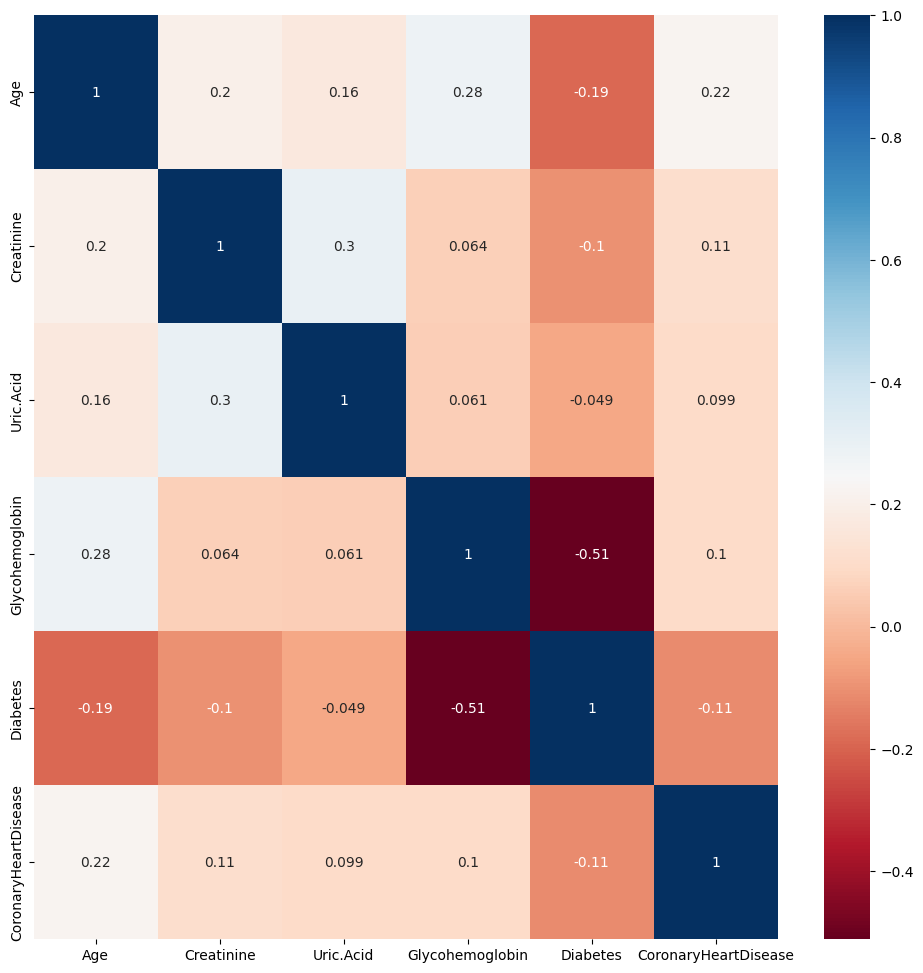

In [12]:
#find correlation matrix
corr_mat=df.corr()
#Select variables have more than 0.09 or less than -0.09 correlation with the target variable(CoronaryHeartDisease)
chosen_variable=corr_mat[abs(corr_mat["CoronaryHeartDisease"])>0.09].index
#plot the heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(df[chosen_variable].corr(),annot=True,cmap='RdBu')

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64


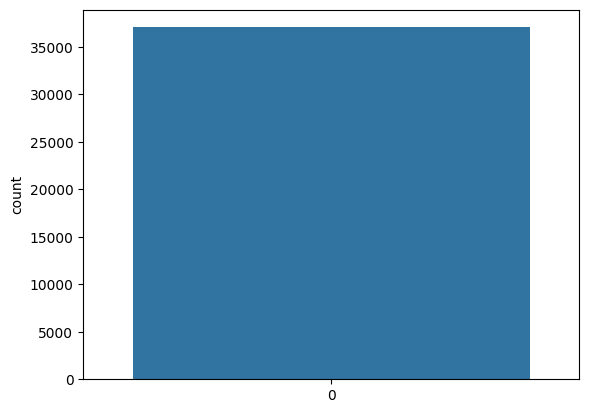

In [13]:
#Analysing the target variable
y = df["CoronaryHeartDisease"]

sns.countplot(y)

target_temp = df.CoronaryHeartDisease.value_counts()

print(target_temp)

<Axes: xlabel='Gender', ylabel='CoronaryHeartDisease'>

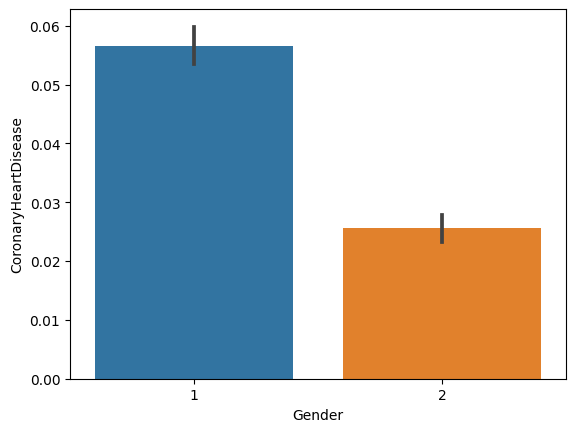

In [14]:
# analyzing gender in the dataset
df["Gender"].unique()

# 1 = Male
# 2 = Female
sns.barplot(x=df["Gender"], y=y)

In [15]:
#number of men and women
GenderIs1 = (df['Gender'] == 1).sum()
GenderIs2 = (df['Gender'] == 0).sum()
print(f'People with gender == 1: {heartDiseaseCount} \nPeople with gender == 2: {noHeartDiseaseCount}')

People with gender == 1: 1508 
People with gender == 2: 35571


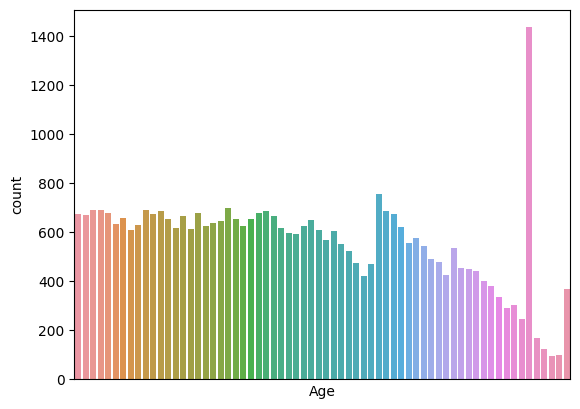

In [16]:
# Analyzing the age feature
df["Age"].unique()

# how many there are in the dataset
sns.countplot(x=df["Age"])
plt.xticks([])  # This line removes the x-axis tick labels
plt.show()

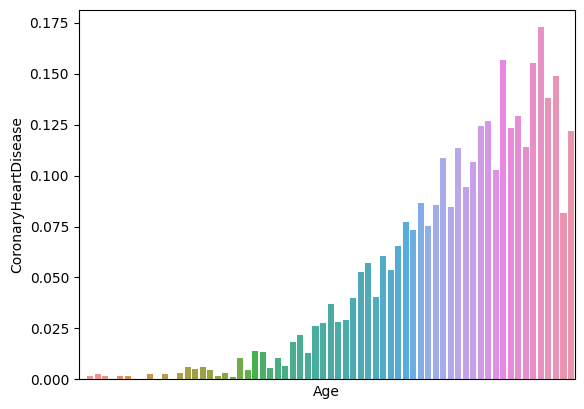

In [17]:
# the percentage who have heart disease
sns.barplot(x=df["Age"],y=y, errorbar=None)
plt.xticks([])
plt.show()

<Axes: xlabel='Diabetes', ylabel='CoronaryHeartDisease'>

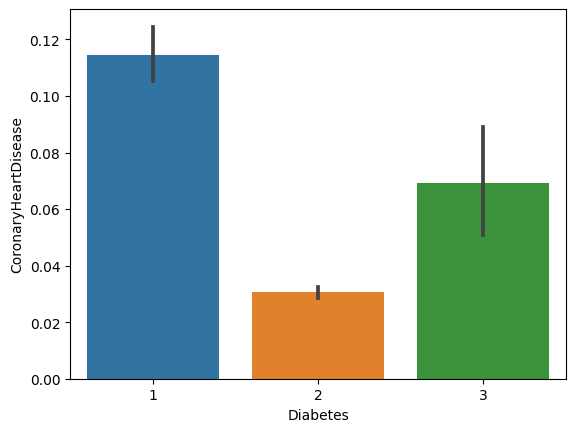

In [18]:
# The margin of error for some of the older ages is larger because of the small sample size, but the error bars hurt the understandability of the graph so I had to remove them.
# analyzing the diabetes feature
df["Diabetes"].unique()

sns.barplot(x=df["Diabetes"],y=y)

<Axes: xlabel='Creatinine', ylabel='Density'>

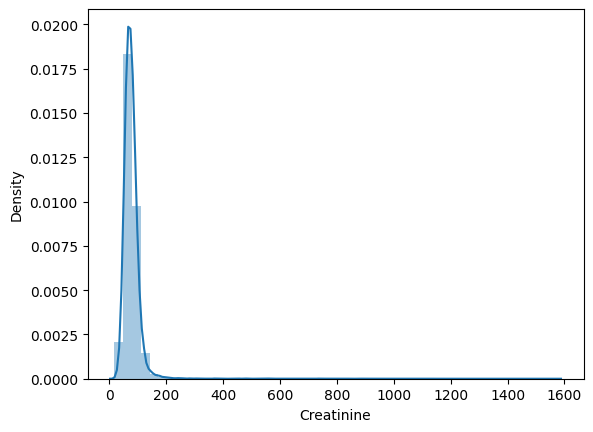

In [19]:
# explorting the density of the creatinine feature
sns.distplot(df['Creatinine'])

<Axes: xlabel='Glycohemoglobin', ylabel='Density'>

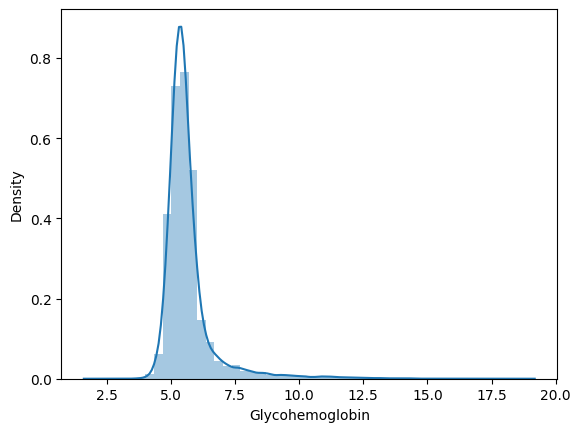

In [20]:
#exploring the density of the Glycohemoglobin feature
sns.distplot(df['Glycohemoglobin'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

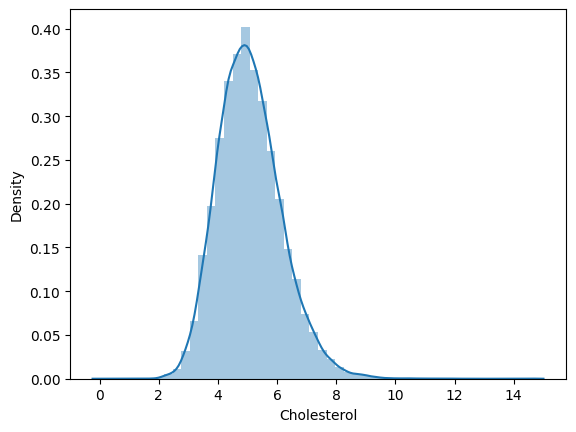

In [21]:
# exploring the density of the cholesterol feature
sns.distplot(df['Cholesterol'])

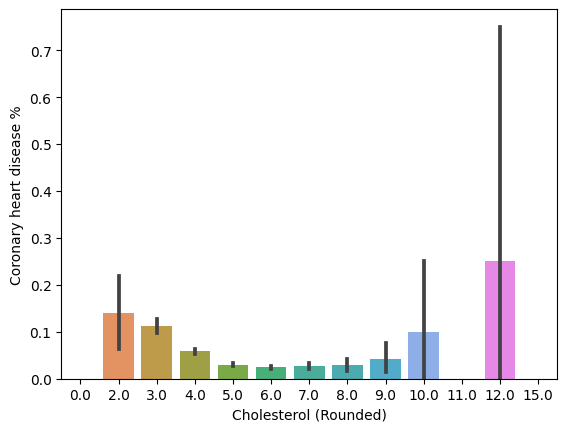

In [22]:
df["Cholesterol_Rounded"] = df["Cholesterol"].round()

# Create the bar plot
sns.barplot(x=df["Cholesterol_Rounded"], y=y)

# Set plot labels and title
plt.xlabel("Cholesterol (Rounded)")
plt.ylabel("Coronary heart disease %")

# Show the plot
plt.show()

## Balancing the Imbalanced Data

In [23]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, y)


## LASSO for Feature Selection

In [24]:
# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 37) (2111,)
Testing set shapes: (452, 37) (452,)
Validation set shapes: (453, 37) (453,)


In [25]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [26]:
# create the lasso model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

lasso_cv.fit(X_train, y_train)

print('The optimal alpha is', lasso_cv.alpha_)

# finding the predicted probability
y_pred_proba = lasso_cv.predict(X_test)
# converting to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)   # might need to lower threshold
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The optimal alpha is 0.01
Accuracy: 0.8008849557522124


In [27]:
#Feature selection in Lasso
col_names = list(X.columns)
selected_features = [col_names[i] for i in range(len(col_names)) if lasso_cv.coef_[i] != 0]

lassoCoef = pd.Series(lasso_cv.coef_, index=X.columns)
print(f'The selected features are \n{lassoCoef[lassoCoef != 0]}')

The selected features are 
Gender                        -0.035988
Age                            0.215956
Diastolic                     -0.008953
Body-Mass-Index                0.003389
White-Blood-Cells              0.002354
Basophils                     -0.007218
Red-Blood-Cells               -0.014661
Platelet-count                -0.026285
Red-Cell-Distribution-Width    0.026369
ALP                            0.002694
Cholesterol                   -0.046242
Creatinine                     0.018879
Iron                          -0.002824
LDH                            0.022235
Uric.Acid                      0.025144
Triglycerides                  0.027337
HDL                           -0.012099
Glycohemoglobin                0.017582
Vigorous-work                  0.007658
Diabetes                      -0.015068
Blood-Rel-Diabetes            -0.017635
Blood-Rel-Stroke              -0.045926
dtype: float64


## Machine Learning Experiments

In [28]:
df_reduced = df[["CoronaryHeartDisease"] + selected_features]

df_reduced

,CoronaryHeartDisease,Gender,Age,Diastolic,Body-Mass-Index,White-Blood-Cells,Basophils,Red-Blood-Cells,Platelet-count,Red-Cell-Distribution-Width,...,Iron,LDH,Uric.Acid,Triglycerides,HDL,Glycohemoglobin,Vigorous-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke
0,0,1,77,56,24.90,7.6,0.5,4.73,214.0,13.7,...,11.28,140,362.8,1.298,1.39,4.7,3,2,2,2
1,0,1,49,83,29.10,5.9,0.4,5.13,209.0,13.1,...,24.54,133,404.5,3.850,1.08,5.5,1,2,2,2
2,0,1,37,99,30.62,10.2,0.6,5.76,357.0,13.6,...,11.28,131,339.0,1.581,0.98,5.2,2,2,1,1
3,0,1,70,66,25.57,11.6,0.4,5.53,228.0,14.4,...,12.18,181,410.4,3.635,1.28,7.6,3,1,1,2
4,0,1,81,61,27.33,9.1,0.4,5.32,160.0,12.4,...,11.82,150,368.8,0.756,1.04,5.8,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,0,1,25,76,21.00,7.1,0.6,5.50,253.0,13.3,...,13.10,144,428.3,1.264,1.27,5.8,2,2,1,2
37075,0,2,76,46,21.50,6.4,0.9,4.70,135.0,13.6,...,15.00,124,368.8,0.948,1.76,5.6,2,2,2,2
37076,0,2,80,58,31.00,4.7,0.8,4.44,172.0,16.9,...,8.40,120,273.6,1.095,2.90,5.7,2,2,2,2
37077,0,1,35,66,26.00,7.6,0.6,5.01,194.0,13.0,...,9.00,136,237.9,0.937,1.09,5.2,2,2,2,1


In [29]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 37) (2111,)
Testing set shapes: (452, 37) (452,)
Validation set shapes: (453, 37) (453,)


In [30]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [31]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

### Logistic Regression

In [32]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7809734513274337
Precision: 0.7701612903225806
Recall: 0.8197424892703863
F1-Score: 0.7941787941787941


##### Validation

In [33]:
y_pred = lr.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7924944812362031
Precision: 0.7586206896551724
Recall: 0.822429906542056
F1-Score: 0.789237668161435


In [34]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Naive Bayes

In [35]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.6836283185840708
Precision: 0.774390243902439
Recall: 0.5450643776824035
F1-Score: 0.6397984886649873


##### Validation

In [36]:
y_pred = nb.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.6865342163355408
Precision: 0.7432432432432432
Recall: 0.514018691588785
F1-Score: 0.6077348066298343


In [37]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### SVM

In [38]:
sv = SVC(C=5, degree=1, gamma=0.001, kernel='poly')

sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7787610619469026
Precision: 0.7587548638132295
Recall: 0.8369098712446352
F1-Score: 0.7959183673469388


##### Validation

In [39]:
y_pred = sv.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7991169977924945
Precision: 0.7551867219917012
Recall: 0.8504672897196262
F1-Score: 0.8


In [40]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### K-Nearest Neighbors

In [41]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7411504424778761
Precision: 0.7589285714285714
Recall: 0.7296137339055794
F1-Score: 0.7439824945295405


##### Validation

In [42]:
y_pred = knn.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7439293598233996
Precision: 0.71875
Recall: 0.7523364485981309
F1-Score: 0.7351598173515982


In [43]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=1800, max_depth=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7876106194690266
Precision: 0.7624521072796935
Recall: 0.8540772532188842
F1-Score: 0.805668016194332


##### Validation

In [45]:
y_pred = rf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8013245033112583
Precision: 0.75
Recall: 0.8691588785046729
F1-Score: 0.8051948051948051


In [46]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### XGBoost

In [47]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=9)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7831858407079646
Precision: 0.7647058823529411
Recall: 0.8369098712446352
F1-Score: 0.7991803278688524


##### Validation

In [48]:
y_pred = xgb_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7991169977924945
Precision: 0.7510204081632653
Recall: 0.8598130841121495
F1-Score: 0.8017429193899782


In [49]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Model Metric Comparison

In [50]:
# create a table/chart with the metrics of all the models and figure out which performs the best
data = [accuracy_list, precision_list, recall_list, f1_list]

df_metrics = pd.DataFrame(data=data, columns=['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Logistic Regression,Naive Bayes,SVM,K-Nearest Neighbors,Random Forest,XGBoost
Accuracy,0.792494,0.686534,0.799117,0.743929,0.801325,0.799117
Precision,0.758621,0.743243,0.755187,0.718750,0.750000,0.751020
Recall,0.822430,0.514019,0.850467,0.752336,0.869159,0.859813
F1-Score,0.789238,0.607735,0.800000,0.735160,0.805195,0.801743


# **Neural Network:**

In [51]:
pip install tensorflow

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

NN_model = models.Sequential()
NN_model.add(layers.Dense(64, input_dim=37, activation='relu'))
NN_model.add(layers.Dense(32, activation='relu'))
NN_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model summary
NN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                2432      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4545 (17.75 KB)
Trainable params: 4545 (17.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
NN_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
#y_pred = NN_model.predict(X_test)

Epoch 1/50
53/53 [==============================] - 2s 8ms/step - loss: 0.5824 - val_loss: 0.5016
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4670 - val_loss: 0.4581
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4326 - val_loss: 0.4540
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4103 - val_loss: 0.4471
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3957 - val_loss: 0.4449
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3820 - val_loss: 0.4483
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3697 - val_loss: 0.4530
Epoch 8/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3603 - val_loss: 0.4499
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3467 - val_loss: 0.4587
Epoch 10/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3367 - val_loss: 0.4644
Epoch 11/50
53/53 [

In [94]:
y_pred = NN_model.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

15/15 [==============================] - 0s 3ms/step
Accuracy: 0.7146017699115044
Precision: 0.7385321100917431
Recall: 0.6909871244635193
F1-Score: 0.7139689578713969


In [95]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

In [97]:
#Update the chart to view the neural network
df_metrics = pd.DataFrame(data=data, columns=['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost', 'Neural Network'],
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Logistic Regression,Naive Bayes,SVM,K-Nearest Neighbors,Random Forest,XGBoost,Neural Network
Accuracy,0.792494,0.686534,0.799117,0.743929,0.801325,0.799117,0.714602
Precision,0.758621,0.743243,0.755187,0.718750,0.750000,0.751020,0.738532
Recall,0.822430,0.514019,0.850467,0.752336,0.869159,0.859813,0.690987
F1-Score,0.789238,0.607735,0.800000,0.735160,0.805195,0.801743,0.713969
